In [2]:
import random
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"  # "last_expr"


%pylab inline
%matplotlib inline

np.random.seed(1)
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.5f}'.format})


#     %%writefile template.py
#     %load template.py - внешний файл

#     %lsmagic

Populating the interactive namespace from numpy and matplotlib


In [28]:
train_data = []
train_labels = []
test_data = []
test_labels = []
with open("Linear/8.txt", "r") as f:
    number_of_features = int(f.readline())
    
    number_of_train_data = int(f.readline())
    for i in range(number_of_train_data):
        tmp = list(map(int, f.readline().split()))
        train_data.append(np.array(tmp[:-1]))
        train_labels.append(tmp[-1])
        
    number_of_test_data = int(f.readline())
    for i in range(number_of_test_data):
        tmp = list(map(int, f.readline().split()))
        test_data.append(np.array(tmp[:-1]))
        test_labels.append(tmp[-1])
        
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [49]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [17]:
from scipy.linalg import svd
U, s, VT = svd()

# SVD

In [168]:
from sklearn.linear_model import Ridge

grid_param = {
    "alpha": np.arange(0.1, 100, 0.1),
    "solver": ["svd"]
}

grid_cv = model_selection.GridSearchCV(
    Ridge(),
    grid_param,
    n_jobs=-1,
    scoring='r2')

In [169]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 886 ms, sys: 271 ms, total: 1.16 s
Wall time: 3.81 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.10000, 100.10000, 200.10000, 300.10000, 400.10000, 500.10000,
       600.10000, 700.10000, 800.10000, 900.10000, 1000.10000, 1100.10000,
       1200.1000...
       7700.10000, 7800.10000, 7900.10000, 8000.10000, 8100.10000,
       8200.10000, 8300.10000, 8400.10000, 8500.10000, 8600.10000,
       8700.10000, 8800.10000, 8900.10000, 9000.10000, 9100.10000,
       9200.10000, 9300.10000, 9400.10000, 9500.10000, 9600.10000,
       9700.10000, 9800.10000, 9900.10000]),
                         'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [171]:
grid_cv.best_params_
grid_cv.best_score_

{'alpha': 9900.1, 'solver': 'svd'}

0.38310872545476793

In [177]:
r2_score(grid_cv.predict(test_data), test_labels)
smape(grid_cv.predict(test_data), test_labels)

0.9998261476196554

2.4694693683029953

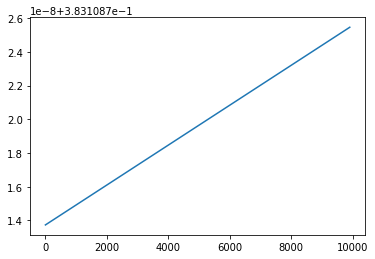

In [176]:
plt.plot(list(grid_cv.cv_results_['param_alpha']),
         grid_cv.cv_results_['mean_test_score'])

In [53]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import r2_score

reg = LinearRegression().fit(train_data, train_labels)

In [52]:
r2_score(reg.predict(test_data), test_labels)
smape(reg.predict(test_data), test_labels)

0.999826048611472

2.4363665161520753

# SGDRegressor

In [115]:
from sklearn.linear_model import SGDRegressor
from sklearn import model_selection
import sklearn.metrics
from sklearn.metrics import make_scorer

grid_param = {
    "alpha": [0.0001, 0.001, 0.01, 0.1],
    "epsilon": [0.1, 0.01, 0.001],
    "eta0": [0.01],
    'learning_rate': ['invscaling'],
    'loss': ['squared_loss', 'huber',
             'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'max_iter': [100, 200, 500, 1000],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'random_state': [7]
}

grid_cv = model_selection.GridSearchCV(
    SGDRegressor(),
    grid_param,
    n_jobs=-1,
    scoring='r2')

In [116]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 5.17 s, sys: 158 ms, total: 5.33 s
Wall time: 1min 38s


GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_s...
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'epsilon': [0.1, 0.01, 0.001], 'eta0': [0.01],
                         'learning_rate': ['invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'eps

In [117]:
grid_cv.best_params_
grid_cv.best_score_

{'alpha': 0.01,
 'epsilon': 0.1,
 'eta0': 0.01,
 'learning_rate': 'invscaling',
 'loss': 'huber',
 'max_iter': 100,
 'penalty': 'elasticnet',
 'random_state': 7}

0.3586437749717047

In [146]:
grid_param = {
    "alpha": [0.01],
    "epsilon": [0.1],
    "eta0": [0.01],
    'learning_rate': ['invscaling'],
    'loss': ['huber'],
    'max_iter': np.arange(1, 50, 1),
    'penalty': ['elasticnet'],
    'random_state': [7]
}

grid_cv = model_selection.GridSearchCV(
    SGDRegressor(),
    grid_param,
    n_jobs=-1,
    scoring='r2')

In [147]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 439 ms, sys: 6.23 ms, total: 446 ms
Wall time: 2.61 s


GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_s...
             param_grid={'alpha': [0.01], 'epsilon': [0.1], 'eta0': [0.01],
                         'learning_rate': ['invscaling'], 'loss': ['huber'],
                         'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 2

### Train Data

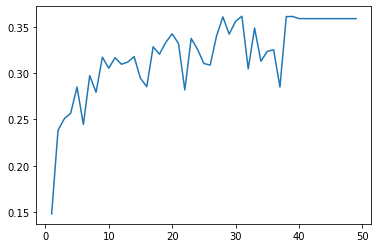

In [132]:
plt.plot(list(grid_cv.cv_results_['param_max_iter']),
         grid_cv.cv_results_['mean_test_score'])

### Test Data

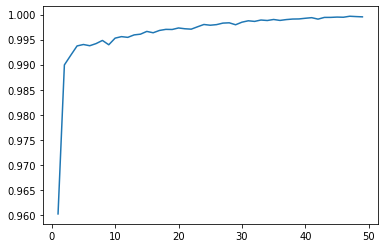

In [134]:
plt.plot(list(grid_cv.cv_results_['param_max_iter']),
         grid_cv.cv_results_['mean_test_score'])

# RANSAC

In [141]:
from sklearn.linear_model import RANSACRegressor

grid_param = {
    'max_trials': np.arange(1, 300, 10)
}

grid_cv = model_selection.GridSearchCV(
    RANSACRegressor(),
    grid_param,
    n_jobs=-1,
    scoring='r2')

In [144]:
%%time
grid_cv.fit(test_data, test_labels)

CPU times: user 415 ms, sys: 170 ms, total: 584 ms
Wall time: 545 ms


GridSearchCV(cv=None, error_score=nan,
             estimator=RANSACRegressor(base_estimator=None, is_data_valid=None,
                                       is_model_valid=None,
                                       loss='absolute_loss', max_skips=inf,
                                       max_trials=100, min_samples=None,
                                       random_state=None,
                                       residual_threshold=None,
                                       stop_n_inliers=inf,
                                       stop_probability=0.99, stop_score=inf),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_trials': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

### Train Data

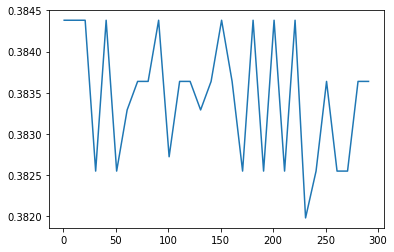

In [143]:
plt.plot(list(grid_cv.cv_results_['param_max_trials']),
         grid_cv.cv_results_['mean_test_score'])

### Test Data

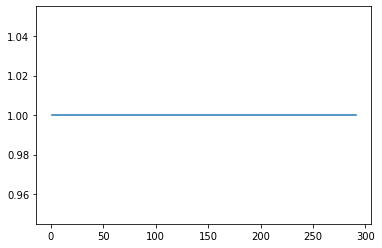

In [145]:
plt.plot(list(grid_cv.cv_results_['param_max_trials']),
         grid_cv.cv_results_['mean_test_score'])

In [148]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}